<br>
<hr>
<center>
    <b>
        <img src="https://www.tecazuay.edu.ec/wp-content/uploads/2023/07/LOGO-RECTANGULAR_SIN-FONDO.png" alt="Logo ISTA" height="150">
        <p><font size="5">Tecnología Superior en Big Data</font></p>
        <p><font size="5">GUÍA PRACTICA N°1</font></p>
    </b>
    <p><font size="3"></font><b>Estudiante: </b>Eduardo Mendieta.</p>
    <p><font size="3"></font><b>Docente: </b>Msc. Ing. Marcelo Monteros Guerrero.</p>
    <p><font size="3"></font><b>Materia: </b>Inteligencia Artificial.</p>
</center>
<hr>

<br>
<center><p><font size="4"><b>EJERCICIO N°1:</b></font></p></center>
<br>

<p><font size="3"><b>1. Analizar la problemática:</b></font></p>
<p>La problemática planteada consiste en realizar diversas operaciones sobre un fichero de texto: leer su contenido, contar las líneas, buscar la frecuencia de una palabra específica (en este caso, el artículo "el"), modificar el contenido eliminando tildes y convirtiéndolo a minúsculas, y finalmente generar un nuevo fichero con los resultados de estas operaciones.</p>

<p><font size="3"><b>2. Diseñar el algoritmo de solución:</b></font></p>
<p>Diseñamos un algoritmo de solución de forma secuencial, dividiendo la tarea en funciones pequeñas y reutilizables. Primero, se crea una función para leer el archivo y obtener su contenido. Luego, otra función contará las líneas del archivo utilizando el salto de línea para dividir el texto en líneas. A continuación, se desarrollará una función que cuente las veces que aparece el artículo "el" como palabra aislada en el texto, asegurándose de que no se cuenten coincidencias parciales dentro de otras palabras. Para la parte de modificar el texto, se implementará una función que reemplace las vocales con tildes por sus equivalentes sin tildes y convierta el texto a minúsculas. Finalmente, una función escribirá los resultados en un nuevo archivo: el número de líneas, el número de ocurrencias del artículo "el" y el texto modificado, todo en el formato solicitado. El diseño del algoritmo está basado en la reutilización de funciones específicas para cada tarea.</p>

<p><font size="3"><b>3. Implementando la solución:</b></font></p>

In [ ]:
def leer_archivo(ruta: str):
    """
    Lee el contenido de un archivo de texto y lo devuelve como una cadena.

    Args:
        ruta (str): La ruta del archivo que se desea leer.

    Returns:
        str: El contenido del archivo como una cadena de texto. Si ocurre un error, devuelve una cadena vacía.
    """
    try:
        with open(ruta, 'r', encoding='latin1') as archivo:
            return archivo.read()
        
    except FileNotFoundError:
        print(f'\nError: El archivo {ruta} no se encuentra.\n' )

    except PermissionError:
        print(f'\nError: No tienes permiso para leer el archivo: {ruta}.\n')
    
    except UnicodeDecodeError as e:
        print(f'\nError de codificación al leer el archivo.\n')
    return ''


# Cuenta el número de lineas basándose en el salto de linea.
get_num_lineas = lambda contenido: contenido.count('\n') + 1 if contenido else 0


def get_num_coincidencias(contenido: str, clave: str):
    """
    Cuenta el número de veces que una palabra clave aparece en el contenido de un texto.

    Args:
        contenido (str): El contenido del archivo o texto donde se buscará la clave.
        clave (str): La palabra clave a buscar en el contenido.

    Returns:
        int: El número de veces que la clave aparece en el contenido. Si el contenido está vacío, devuelve 0.
    """
    try:
        if not contenido: raise ValueError("El contenido no puede estar vacío.")

        contenido = contenido.replace('\n', ' ')
        palabras = contenido.lower().split()
        
        return len([i for i in palabras if i == clave])
    
    except ValueError as e:
        print(f'\nError: {e}\n')

    except TypeError as e:
        print(f'\nError, tipo de dato no permitido.\n')
    
    return 0


def reemplazar_tildes(contenido: str):
    """
    Reemplaza las vocales con tildes por las correspondientes sin tildes en el texto.

    Args:
        contenido (str): El contenido del texto donde se reemplazarán las vocales con tildes.

    Returns:
        str: El contenido con las vocales sin tildes. Si el contenido está vacío, devuelve una cadena vacía.

    """
    try:
        if not contenido: raise ValueError("El contenido no puede estar vacío.")

        vocales_con_tildes = ('á', 'é', 'í', 'ó', 'ú')
        vocales_sin_tildes = ('a', 'e', 'i', 'o', 'u')
        contenido = contenido.lower()
        
        for i in range(len(vocales_con_tildes)):
            contenido = contenido.replace(vocales_con_tildes[i], vocales_sin_tildes[i])

        return contenido

    except ValueError as e:
        print(f'\nError: {e}\n')

    except TypeError as e:
        print(f'\nError, tipo de dato no permitido.\n')

    return ''


def escribir_archivo(ruta: str, contenido: list):
    """
    Escribe una lista de cadenas de texto en un archivo, cada elemento en una nueva línea.

    Args:
        ruta (str): La ruta donde se desea guardar el archivo.
        contenido (list): Lista de cadenas de texto que se escribirán en el archivo.

    Returns:
        None: Imprime un mensaje indicando si el archivo fue escrito correctamente o si hubo un error.
    """
    try:
        with open(ruta, 'w') as archivo:
            for i in contenido:
                archivo.write(i + '\n')
        
        print('\nArchivo escrito con éxito.\n')

    except OSError as e:
        print('\nError con la ruta o el nombre del archivo.\n')

    except TypeError as e:
        print(f'\nError, tipo de dato no permitido.\n')


<p><font size="3"><b>4. Probando la funcionalidad:</b></font></p>

In [41]:
# Leendo el fichero y obteniendo su contenido:
contenido = leer_archivo('data/FicheroALeer.txt')

print(f'\n{contenido[0: len(contenido)//20] + '...'}\n')


En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho
tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua,
rocín flaco y galgo corredor. Una olla de algo más vaca que carnero,
salpicón las más noches, duelos y quebrantos los sábados, lantejas los
viernes, algún palomino de añadidura los domingos, co...



In [42]:
# Contando el numero de linas del fichero:
num_lineas = get_num_lineas(contenido)

print(f'\nNúmero de lineas del fichero: {num_lineas}')


Número de lineas del fichero: 101


In [50]:
# Contando el número de veces que aparece el artículo [el] en el contenido del fichero:
coincidencias_el = get_num_coincidencias(contenido, 'el')

print(f'\nNúmero de coincidencias del artículo [el] en el contenido del fichero: {coincidencias_el}\n')



Número de coincidencias del artículo [el] en el contenido del fichero: 28



In [51]:
# Eliminando las tildes del fichero y conviertiendo todas las letras a minúscula:
contenido = reemplazar_tildes(contenido)

print(f'\n{contenido[0: len(contenido)//20] + '...'}\n')


en un lugar de la mancha, de cuyo nombre no quiero acordarme, no ha mucho
tiempo que vivia un hidalgo de los de lanza en astillero, adarga antigua,
rocin flaco y galgo corredor. una olla de algo mas vaca que carnero,
salpicon las mas noches, duelos y quebrantos los sabados, lantejas los
viernes, algun palomino de añadidura los domingos, co...



In [54]:
# Creando el fichero de texto:
lineas = [f'Número de lineas del fichero: {num_lineas}', 
          f'Número de coincidencias del artículo [el] en el contenido del fichero: {coincidencias_el}',
          contenido]

escribir_archivo('data/resultado.txt', lineas)


Archivo escrito con éxito.



<hr>
<br>
<center><p><font size="4"><b>EJERCICIO N°2:</b></font></p></center>
<br>

<p><font size="3"><b>1. Analizar la problemática:</b></font></p>
<p>La problemática planteada consiste en realizar tres operaciones principales sobre un archivo y los datos que contiene. Primero, se debe cargar un archivo CSV denominado poblacionMunicipios.csv, que contiene información sobre varias provincias. En segundo lugar, se debe agregar una nueva columna al dataframe cargado, denominada "Código postal", que siga un formato específico para cada provincia. Finalmente, se requiere investigar los datos de población de las provincias de Ecuador y, con esos datos, dibujar un gráfico de pastel usando matplotlib que muestre la distribución porcentual de la población de cada provincia.</p>

<p><font size="3"><b>2. Diseñar el algoritmo de solución:</b></font></p>
<p>Diseñamos un algoritmo de solución en tres pasos principales. En el primer paso, se implementa una función para cargar el archivo CSV poblacionMunicipios.csv en un DataFrame utilizando pandas. En el segundo paso, se crea una función que agregua la columna "Código postal" al DataFrame. Esto requiere ordenar las provincias alfabéticamente y asignarles un código de tres dígitos, utilizando las primeras tres letras del nombre de la provincia y el número secuencial correspondiente. Para ello, se utilizará la función str.slice para extraer las primeras tres letras de la provincia y una lista con números secuenciales para asignar el código postal a cada una. Finalmente, en el tercer paso, se implementa una función que grafica un pastel con la distribución porcentual de la población de las provincias de Ecuador. Para ello, se utilizarán los datos de población de las provincias de Ecuador, se procesarán en un DataFrame y se graficará el resultado con matplotlib, donde cada sector del pastel representa el porcentaje de la población de cada provincia en relación con el total.</p>

<p><font size="3"><b>3. Implementando la solución:</b></font></p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def get_dataframe(ruta: str):
    """
    Lee un archivo CSV y devuelve un DataFrame.

    Args:
        ruta (str): Ruta al archivo CSV.

    Returns:
        pd.DataFrame: DataFrame con los datos del archivo CSV, o None si ocurre un error.
    """
    try:
        return pd.read_csv(ruta)
    except FileNotFoundError as e:
        print(f'\nError, no se puede encontrar la ruta especificada.\n')
        return
    

def agregar_codigo_postal(df):
    """
    Agrega una columna 'Código postal' a un DataFrame basado en las primeras tres letras de la provincia
    y un número de secuencia para cada una.

    Args:
        df (pd.DataFrame): DataFrame que contiene la columna 'Provincia'.

    Returns:
        pd.DataFrame: DataFrame con la columna 'Código postal' agregada, o None si ocurre un error.
    """
    try:
        df_provincia = df[['Provincia']].drop_duplicates(subset='Provincia').sort_values(by='Provincia')
        numeracion = [f'00{i}' if i < 10 else f'0{i}' for i in range(1, len(df_provincia) + 1)]
        df_provincia['Código postal'] = df_provincia['Provincia'].str[:3] + '_' + numeracion
        
        return df_provincia
    
    except TypeError as e:
        print(f'\nError, tipo de dato incorrecto.\n')
    
    except KeyError as e:
        print(f'\nError, no se puede encontrar la columna especificada.\n')
    
    return


def dibujar_pastel():
    """
    Dibuja un gráfico de pastel que muestra la distribución de la población de las provincias de Ecuador
    basándose en los datos proporcionados.

    Returns:
        None
    """
    datos = {'Azuay': 881394, 'Bolívar': 209933, 'Cañar': 281396, 'Carchi': 186869, 'Chimborazo': 524004,
            'Cotopaxi': 488716, 'El Oro': 715751,'Esmeraldas': 643654,'Galápagos': 33042,'Guayas': 4387434, 
            'Imbabura': 476257,'Loja': 521154, 'Los Ríos': 921763, 'Manabí': 1562079, 'Morona Santiago': 196535, 
            'Napo': 133705,'Orellana': 161338, 'Pastaza': 114202,'Pichincha': 3228233,'Santa Elena': 401178, 
            'Sto. Dgo. Tsáchilas': 458580, 'Sucumbios': 230503, 'Tungurahua': 590600, 'Zamora Chinchipe': 120416}


    df = pd.DataFrame({'Provincia': datos.keys(), 'Habitantes': datos.values()})

    # Posicion de la figura.
    plt.figure(figsize=(10, 8)) 
    # 'autopct' proporciona un formato con un decimal.
    plt.pie(df['Habitantes'], labels=df['Provincia'], autopct='%1.1f%%', startangle=140)

    plt.title('Distribución de la población del Eduador por provincia en 2020')

    # Asegura que el grafico sea circular.
    plt.axis('equal')
    plt.show()


<p><font size="3"><b>4. Probando la funcionalidad:</b></font></p>

In [ ]:
# Obteniendo registros unicos y agregando columna de Código postal:
agregar_codigo_postal(get_dataframe('data/poblacionMunicipios.csv')).head(10)

,Provincia,Código postal
52,Albacete,Alb_001
139,Alicante/Alacant,Ali_002
280,Almería,Alm_003
0,Araba/Álava,Ara_004
4967,Asturias,Ast_005
630,Badajoz,Bad_006
794,"Balears, Illes",Bal_007
861,Barcelona,Bar_008
7462,Bizkaia,Biz_009
1172,Burgos,Bur_010


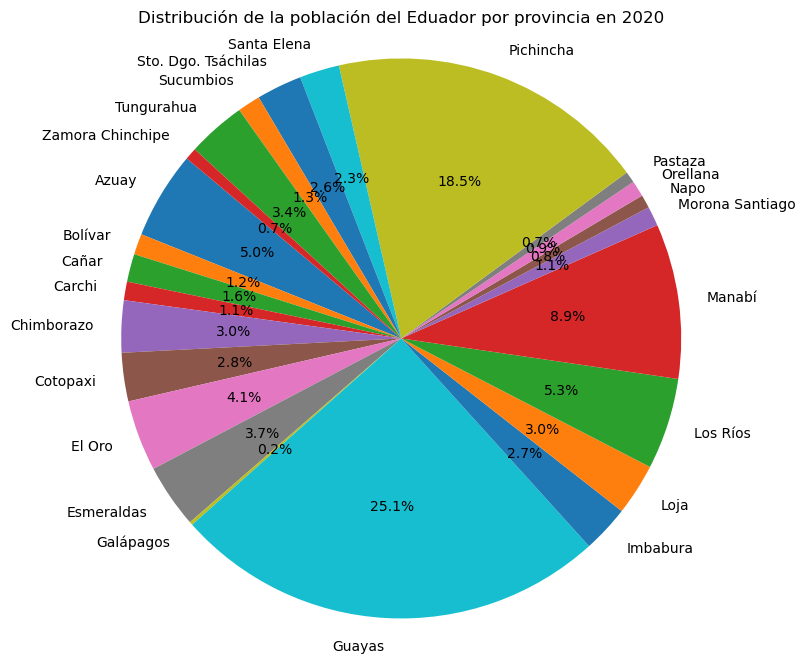

In [179]:
# Fuente: https://www.igualdadgenero.gob.ec/wp-content/uploads/downloads/2021/09/POBLACION-DEL-ECUADOR-SEGUN-PROVINCIA.pdf

dibujar_pastel()